<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/PCA_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
link = "/content/drive/MyDrive/Machine Learning Python/CURSO INFOPUC/Controles/Copia de sensor lb.csv"
dataset = pd.read_csv(link, sep = ';')
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187


In [3]:
# Para evitar trabajar con  todos los datos y retrasar el modelo de clasificación, filtramos los datos
dataset = dataset.query("Activo_id <= 20") 

In [4]:
len(dataset)

4168

In [5]:
# Cúantos vuelos cómo máximo tiene cada avión

y = dataset.groupby('Activo_id').agg({'ciclo':'max'}).reset_index()
y.head()

,Activo_id,ciclo
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [6]:
%load_ext rpy2.ipython 

In [7]:
%%R
install.packages("fitdistrplus")
install.packages("ggplot")
library(fitdistrplus)
library(ggplot2)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/fitdistrplus_1.1-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2354740 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


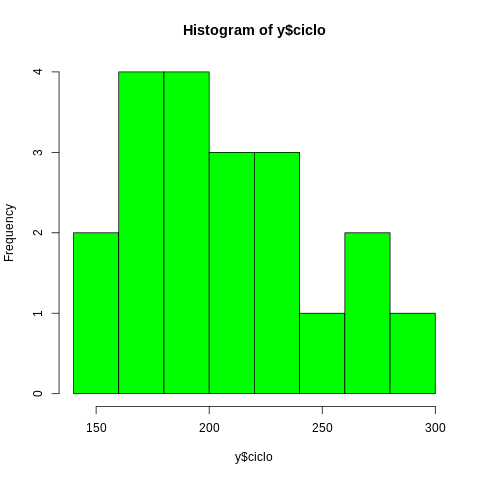

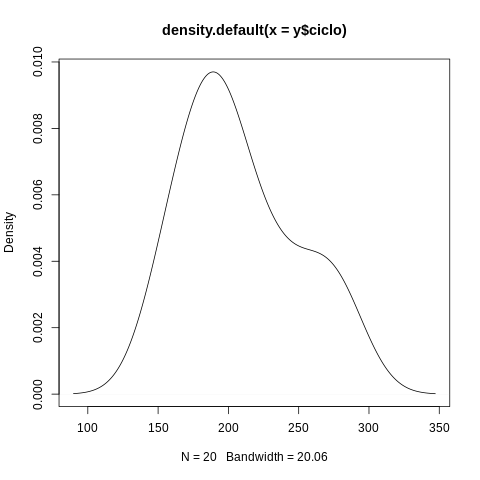

In [8]:
%%R -i y
 hist(y$ciclo, col = 'green')
 plot(density(y$ciclo))

In [9]:
%%R

fw = fitdist(y$ciclo,"weibull")
summary(fw)

$start.arg
$start.arg$shape
[1] 6.302095

$start.arg$scale
[1] 224.2529


$fix.arg
NULL

Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters : 
        estimate Std. Error
shape   5.546803  0.9324136
scale 225.170355  9.6361143
Loglikelihood:  -102.6954   AIC:  209.3908   BIC:  211.3822 
Correlation matrix:
          shape     scale
shape 1.0000000 0.3354333
scale 0.3354333 1.0000000



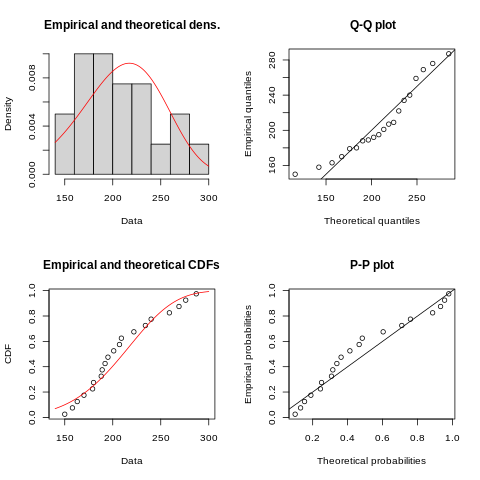

In [10]:
%%R

plot(fw)

Columna Porcentaje de vida

In [11]:
# cuenta regresiva hasta que falla

dataset['vida'] = 100*dataset['ciclo']/dataset.max_ciclo
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down,vida
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,0.520833
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,1.041667
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,1.562500
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,2.083333
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,2.604167


Variable Objetivo

In [12]:
vida = 80
dataset['y_target'] = np.where(dataset.vida < vida,0,1)
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down,vida,y_target
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,0.520833,0
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,1.041667,0
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,1.562500,0
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,2.083333,0
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,2.604167,0


Matriz de características

In [13]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values 

Dvisión del datset en conjunto de train y testing

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

Escalado de variables recomendable para algoritmos de clasficación

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Aplicar PCA

In [16]:
# Reducir la dimensión del dataset con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_ # Para obtener el nivel de aporte de cada componente
print(explained_variance)

[0.58013285 0.14379099]


Generar el modelo

In [17]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(random_state = 0, max_iter = 30)  
modelo.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=30,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Generando predicciones

In [18]:
y_pred = modelo.predict(X_test)

In [19]:
compara = np.concatenate([Y_test.reshape(-1,1),y_pred.reshape(-1,1)],axis = 1)
pd.DataFrame(compara,columns = ['Real','Predicción']).head()

,Real,Predicción
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


Elaborar matriz de confusión

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score
matriz_confusion = confusion_matrix(Y_test,y_pred)
matriz_confusion

array([[644,  17],
       [ 11, 162]])

0.9664268585131894


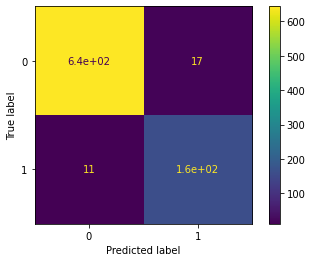

In [21]:
# Se evalúa en ambos conjuntos de testing
plot_confusion_matrix(modelo, X_test,Y_test)
print(accuracy_score(Y_test,y_pred))

K-FOLD CROSS VALIDATION

In [22]:
from sklearn.model_selection import cross_val_score
precisiones = cross_val_score(modelo,X_train,Y_train,scoring = "accuracy", cv = 10)
print(precisiones)
print(precisiones.mean())
print(precisiones.std())

[0.96407186 0.95508982 0.97305389 0.98203593 0.96396396 0.95495495
 0.95795796 0.96996997 0.96996997 0.97897898]
0.9670047292801783
0.009001952327015384


Representación Gráfica

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


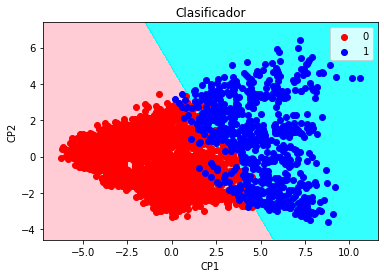

In [30]:
# Representación gráfica de los resultados del algoritmo enel Conjunto de Entrenamiento
#np.meshgrid: Combina os matrices en una sola
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, modelo.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.8, cmap = ListedColormap(('pink','cyan','cyan')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
              c = ListedColormap(('red','blue','blue'))(i), label = j)
plt.title("Clasificador")
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()
